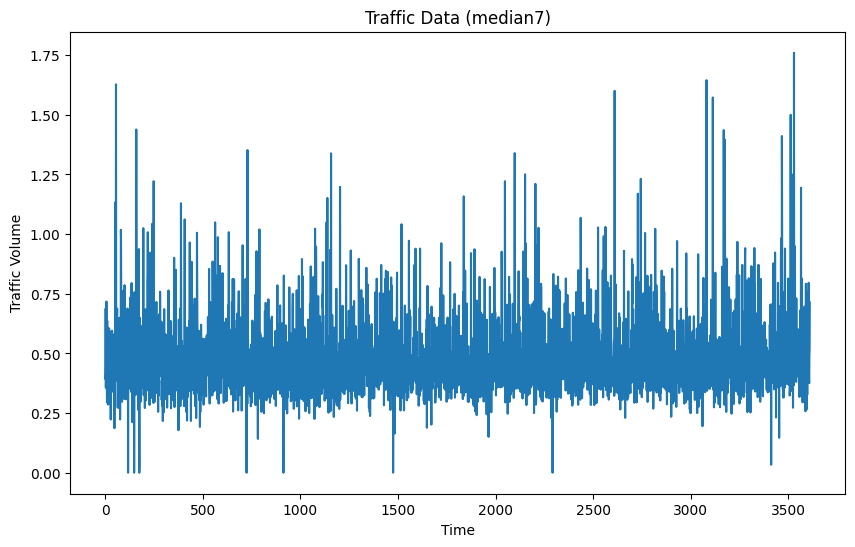

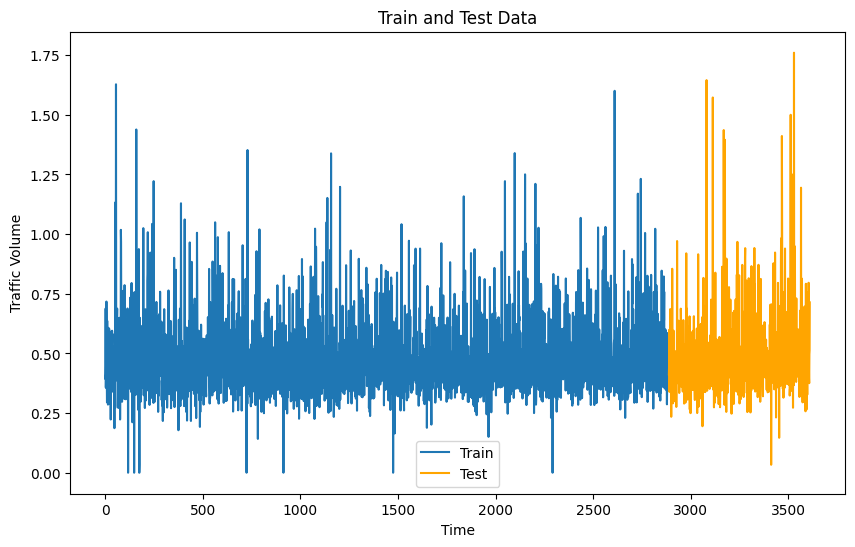

                               SARIMAX Results                                
Dep. Variable:                median7   No. Observations:                 2888
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1049.621
Date:                Wed, 19 Jun 2024   AIC                          -2087.242
Time:                        10:52:36   BIC                          -2051.434
Sample:                             0   HQIC                         -2074.337
                               - 2888                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7812      0.017    -46.896      0.000      -0.814      -0.749
ar.L2         -0.6312      0.021    -30.212      0.000      -0.672      -0.590
ar.L3         -0.4771      0.022    -22.176      0.0

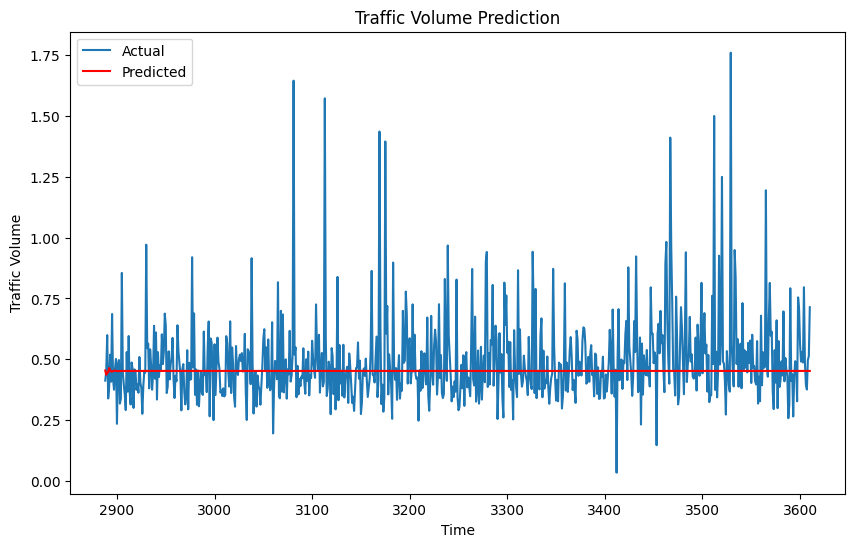

Test MSE: 0.033015016512887296
Test MAE: 0.1138458266968419


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
data = pd.read_csv('validation_score.csv')

# Plot the median7 column to visualize the traffic data
plt.figure(figsize=(10, 6))
plt.plot(data['median7'])
plt.title('Traffic Data (median7)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.show()

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data['median7'][:train_size], data['median7'][train_size:]

# Plot training and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

# Build and train the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) order for ARIMA
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Traffic Volume Prediction')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

# Evaluate the model using various metrics
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3611 non-null   int64  
 1   median7      3611 non-null   float64
 2   median14     3611 non-null   float64
 3   median21     3611 non-null   float64
 4   median28     3611 non-null   float64
 5   median35     3611 non-null   float64
 6   median42     3611 non-null   float64
 7   median49     3611 non-null   float64
 8   median7_h    3611 non-null   float64
 9   median14_h   3611 non-null   float64
 10  median21_h   3611 non-null   float64
 11  median28_h   3611 non-null   float64
 12  median35_h   3611 non-null   float64
 13  median42_h   3611 non-null   float64
 14  median49_h   3611 non-null   float64
 15  holiday      3611 non-null   float64
 16  holiday_log  3610 non-null   float64
 17  yearly_log   3610 non-null   float64
dtypes: float64(17), int64(1)
memory usage: 507.9 KB
